In [20]:
import sys 
import numpy as np
import pandas as pd
import statsmodels as sm
import sklearn
import scipy as sp
%matplotlib inline 
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [42]:
data = pd.read_csv("train.csv")

# 1. Exploration data analysis

In [6]:
data.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [15]:
data.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [17]:
formatted = data.isnull().sum()/len(data)*100
formatted = formatted.round(2).astype(str) + '%'
print(formatted)

id                             0.0%
Time_spent_Alone              6.42%
Stage_fear                   10.22%
Social_event_attendance       6.37%
Going_outside                 7.91%
Drained_after_socializing      6.2%
Friends_circle_size           5.69%
Post_frequency                6.82%
Personality                    0.0%
dtype: object


In [18]:
data.duplicated().any() # there is no duplicates 

False

In [19]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


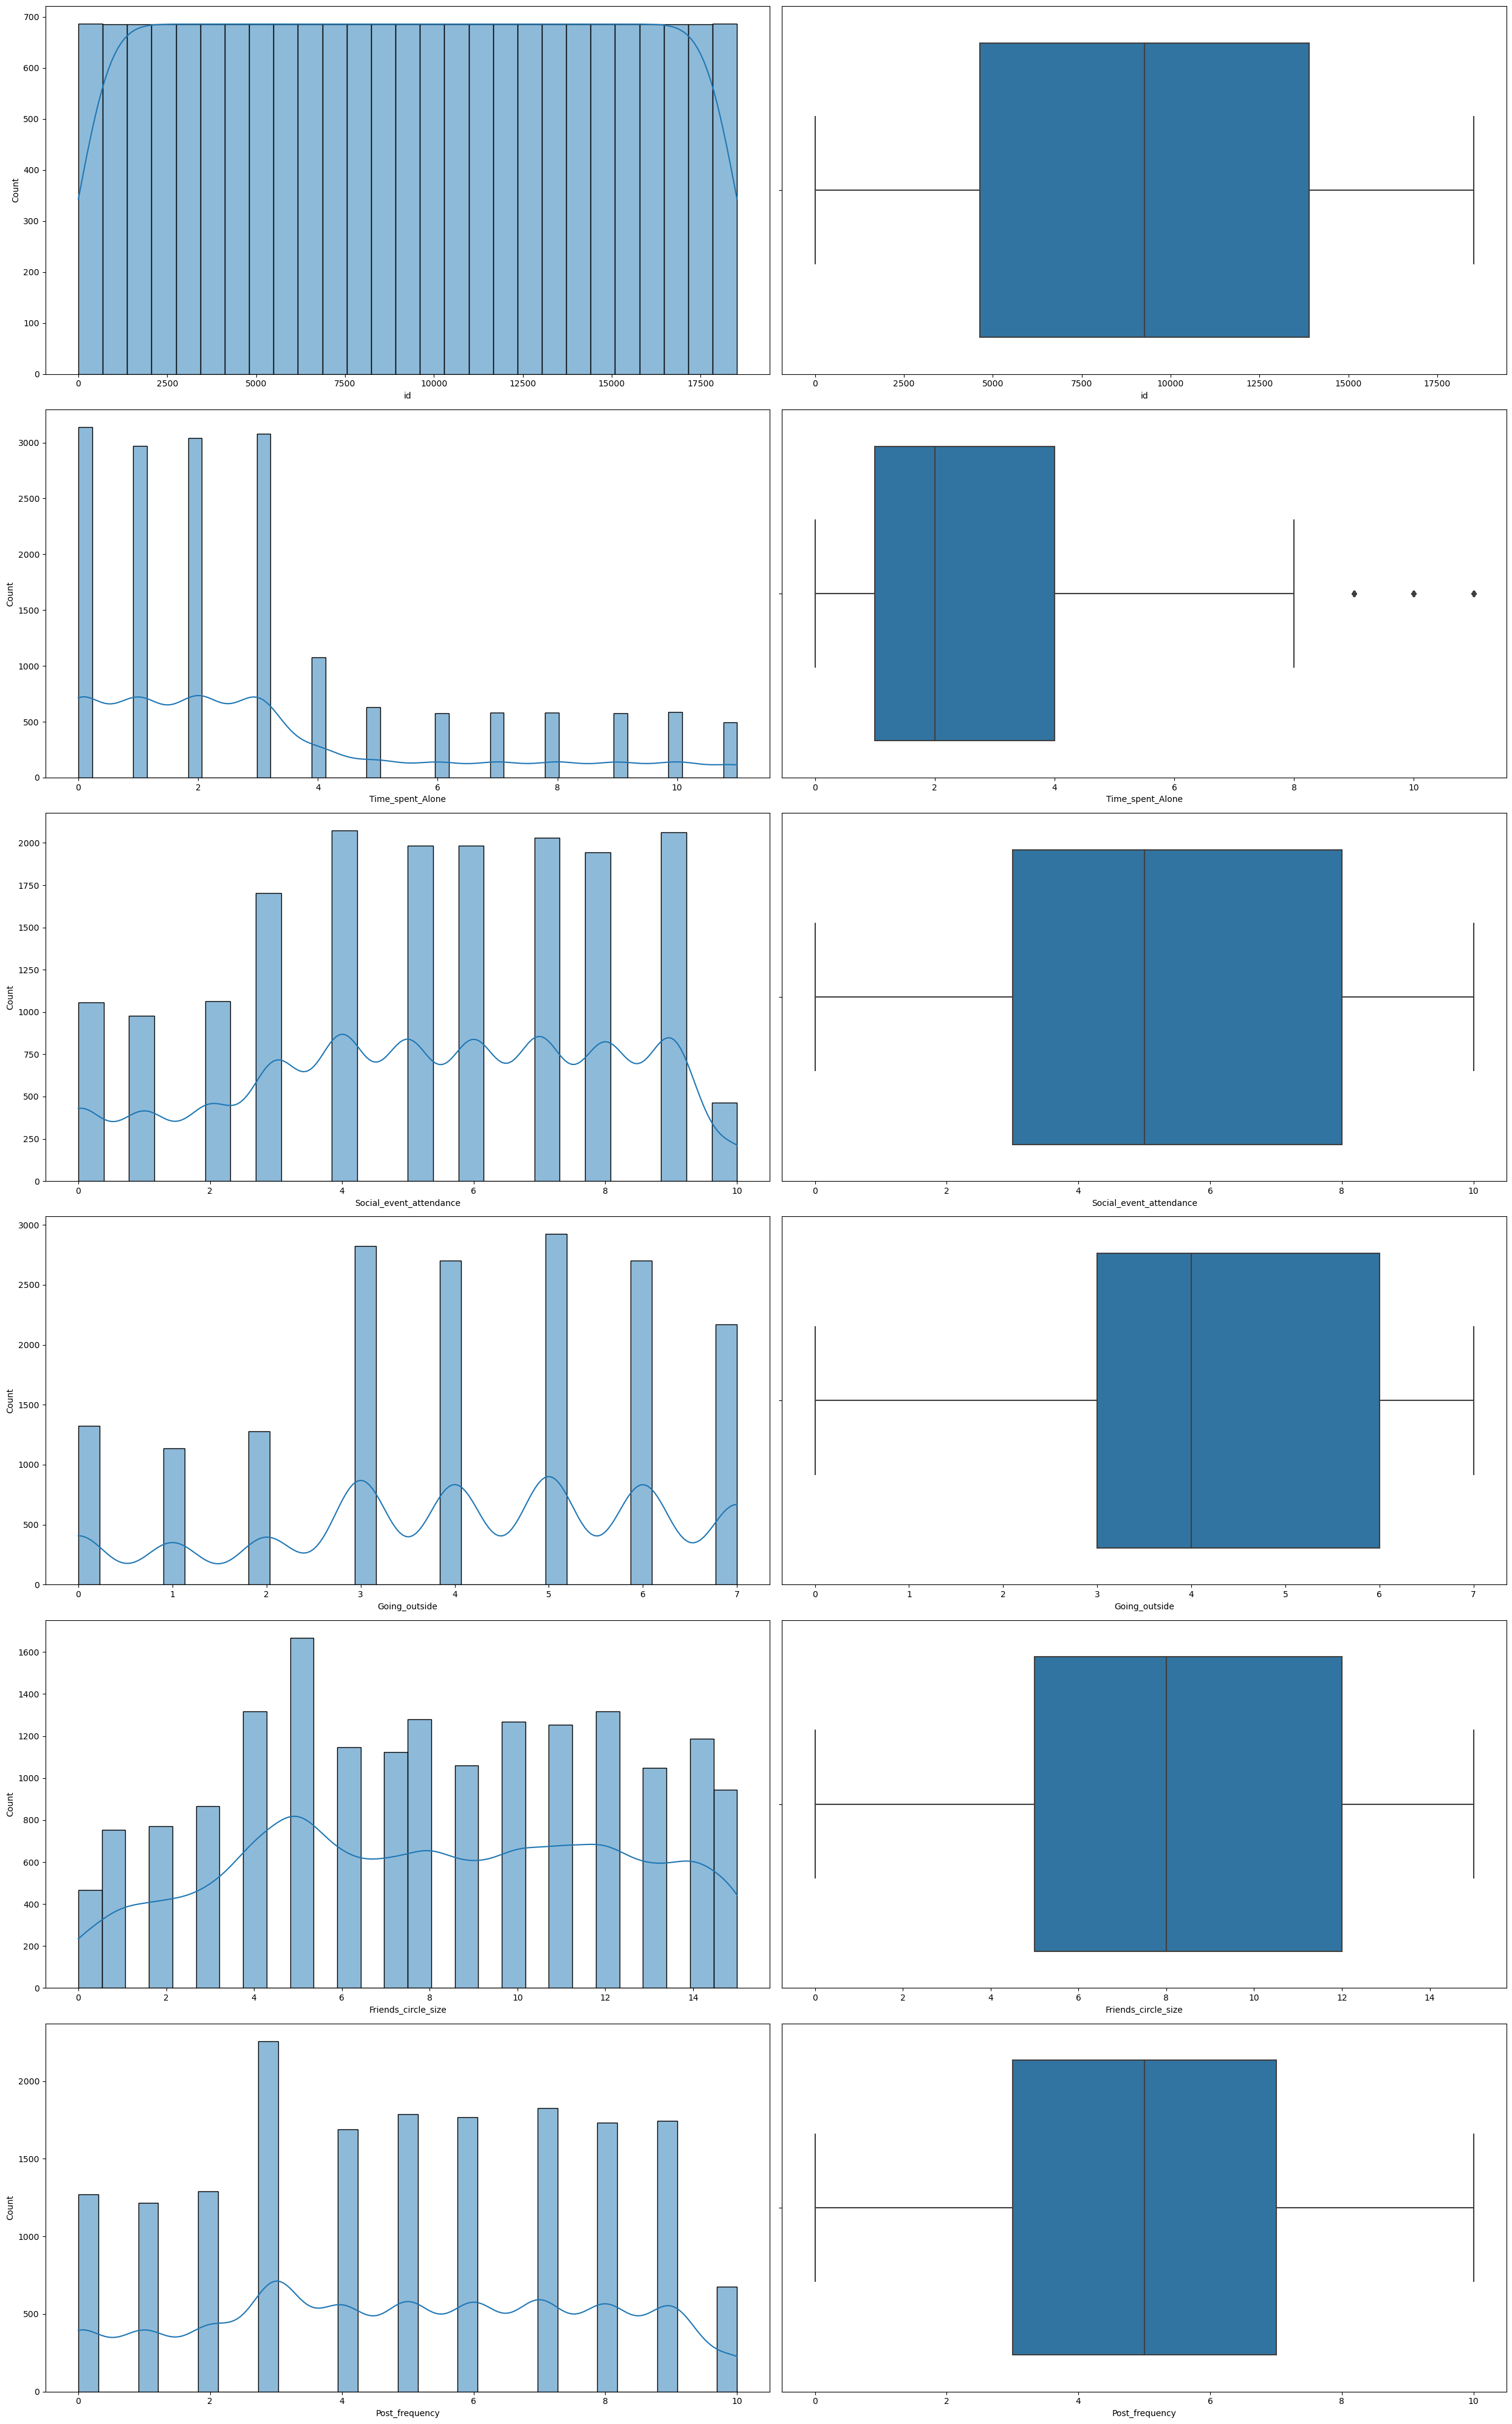

In [43]:
num_cols =data.select_dtypes(include='number')
obj_cols = data.select_dtypes(include='object')

fig, axes = plt.subplots(nrows=6,ncols =2, figsize=(25, 40))
for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i,0])
    sns.boxplot(x=data[col], ax=axes[i,1])
plt.tight_layout()
plt.show()

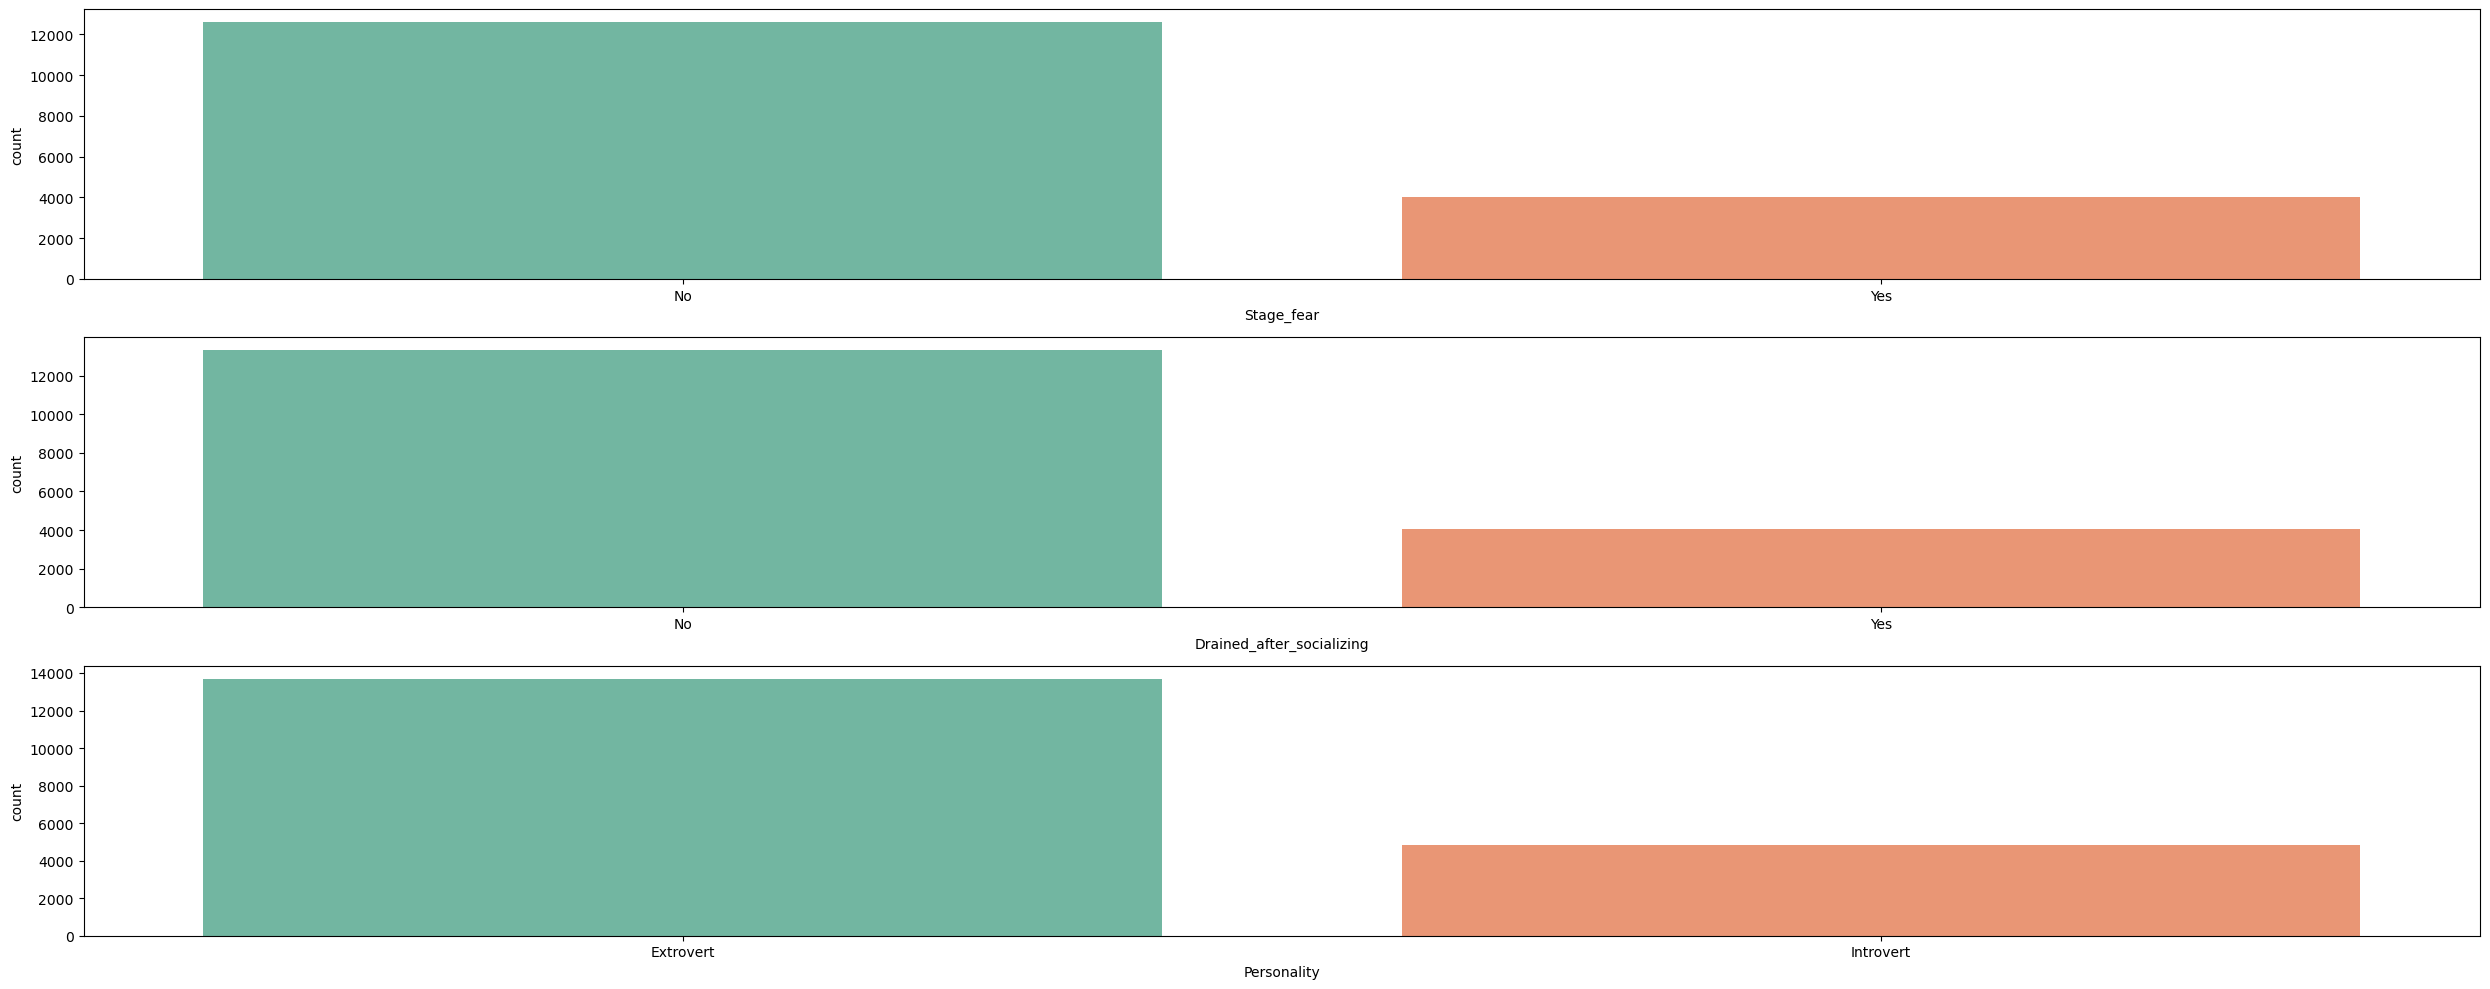

In [44]:
fig, axes = plt.subplots(nrows=3,ncols =1, figsize=(25, 10))
for i, col in enumerate(obj_cols):
    sns.countplot(x=data[col], ax=axes[i], palette='Set2')
plt.tight_layout()
plt.show()

In [45]:
# Manually assign the numerical value to object columns 
conversion_1 = {'No':0,'Yes':1}
conversion_2 = {'Introvert':0,'Extrovert':1}
data['Stage_fear'] = data['Stage_fear'].map(conversion_1)
data['Drained_after_socializing'] = data['Drained_after_socializing'].map(conversion_1)
data['Personality'] = data['Personality'].map(conversion_2)
data[['Stage_fear','Drained_after_socializing','Personality']]

,Stage_fear,Drained_after_socializing,Personality
0,0.0,0.0,1
1,0.0,0.0,1
2,1.0,NaN,0
3,0.0,0.0,1
4,0.0,0.0,1
...,...,...,...
18519,0.0,0.0,1
18520,NaN,0.0,1
18521,1.0,1.0,0
18522,1.0,1.0,0


In [47]:
target = data['Personality']
X = data.drop(columns = ['id','Personality'])
X_names = X.columns.tolist()
print(X_names)

['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']


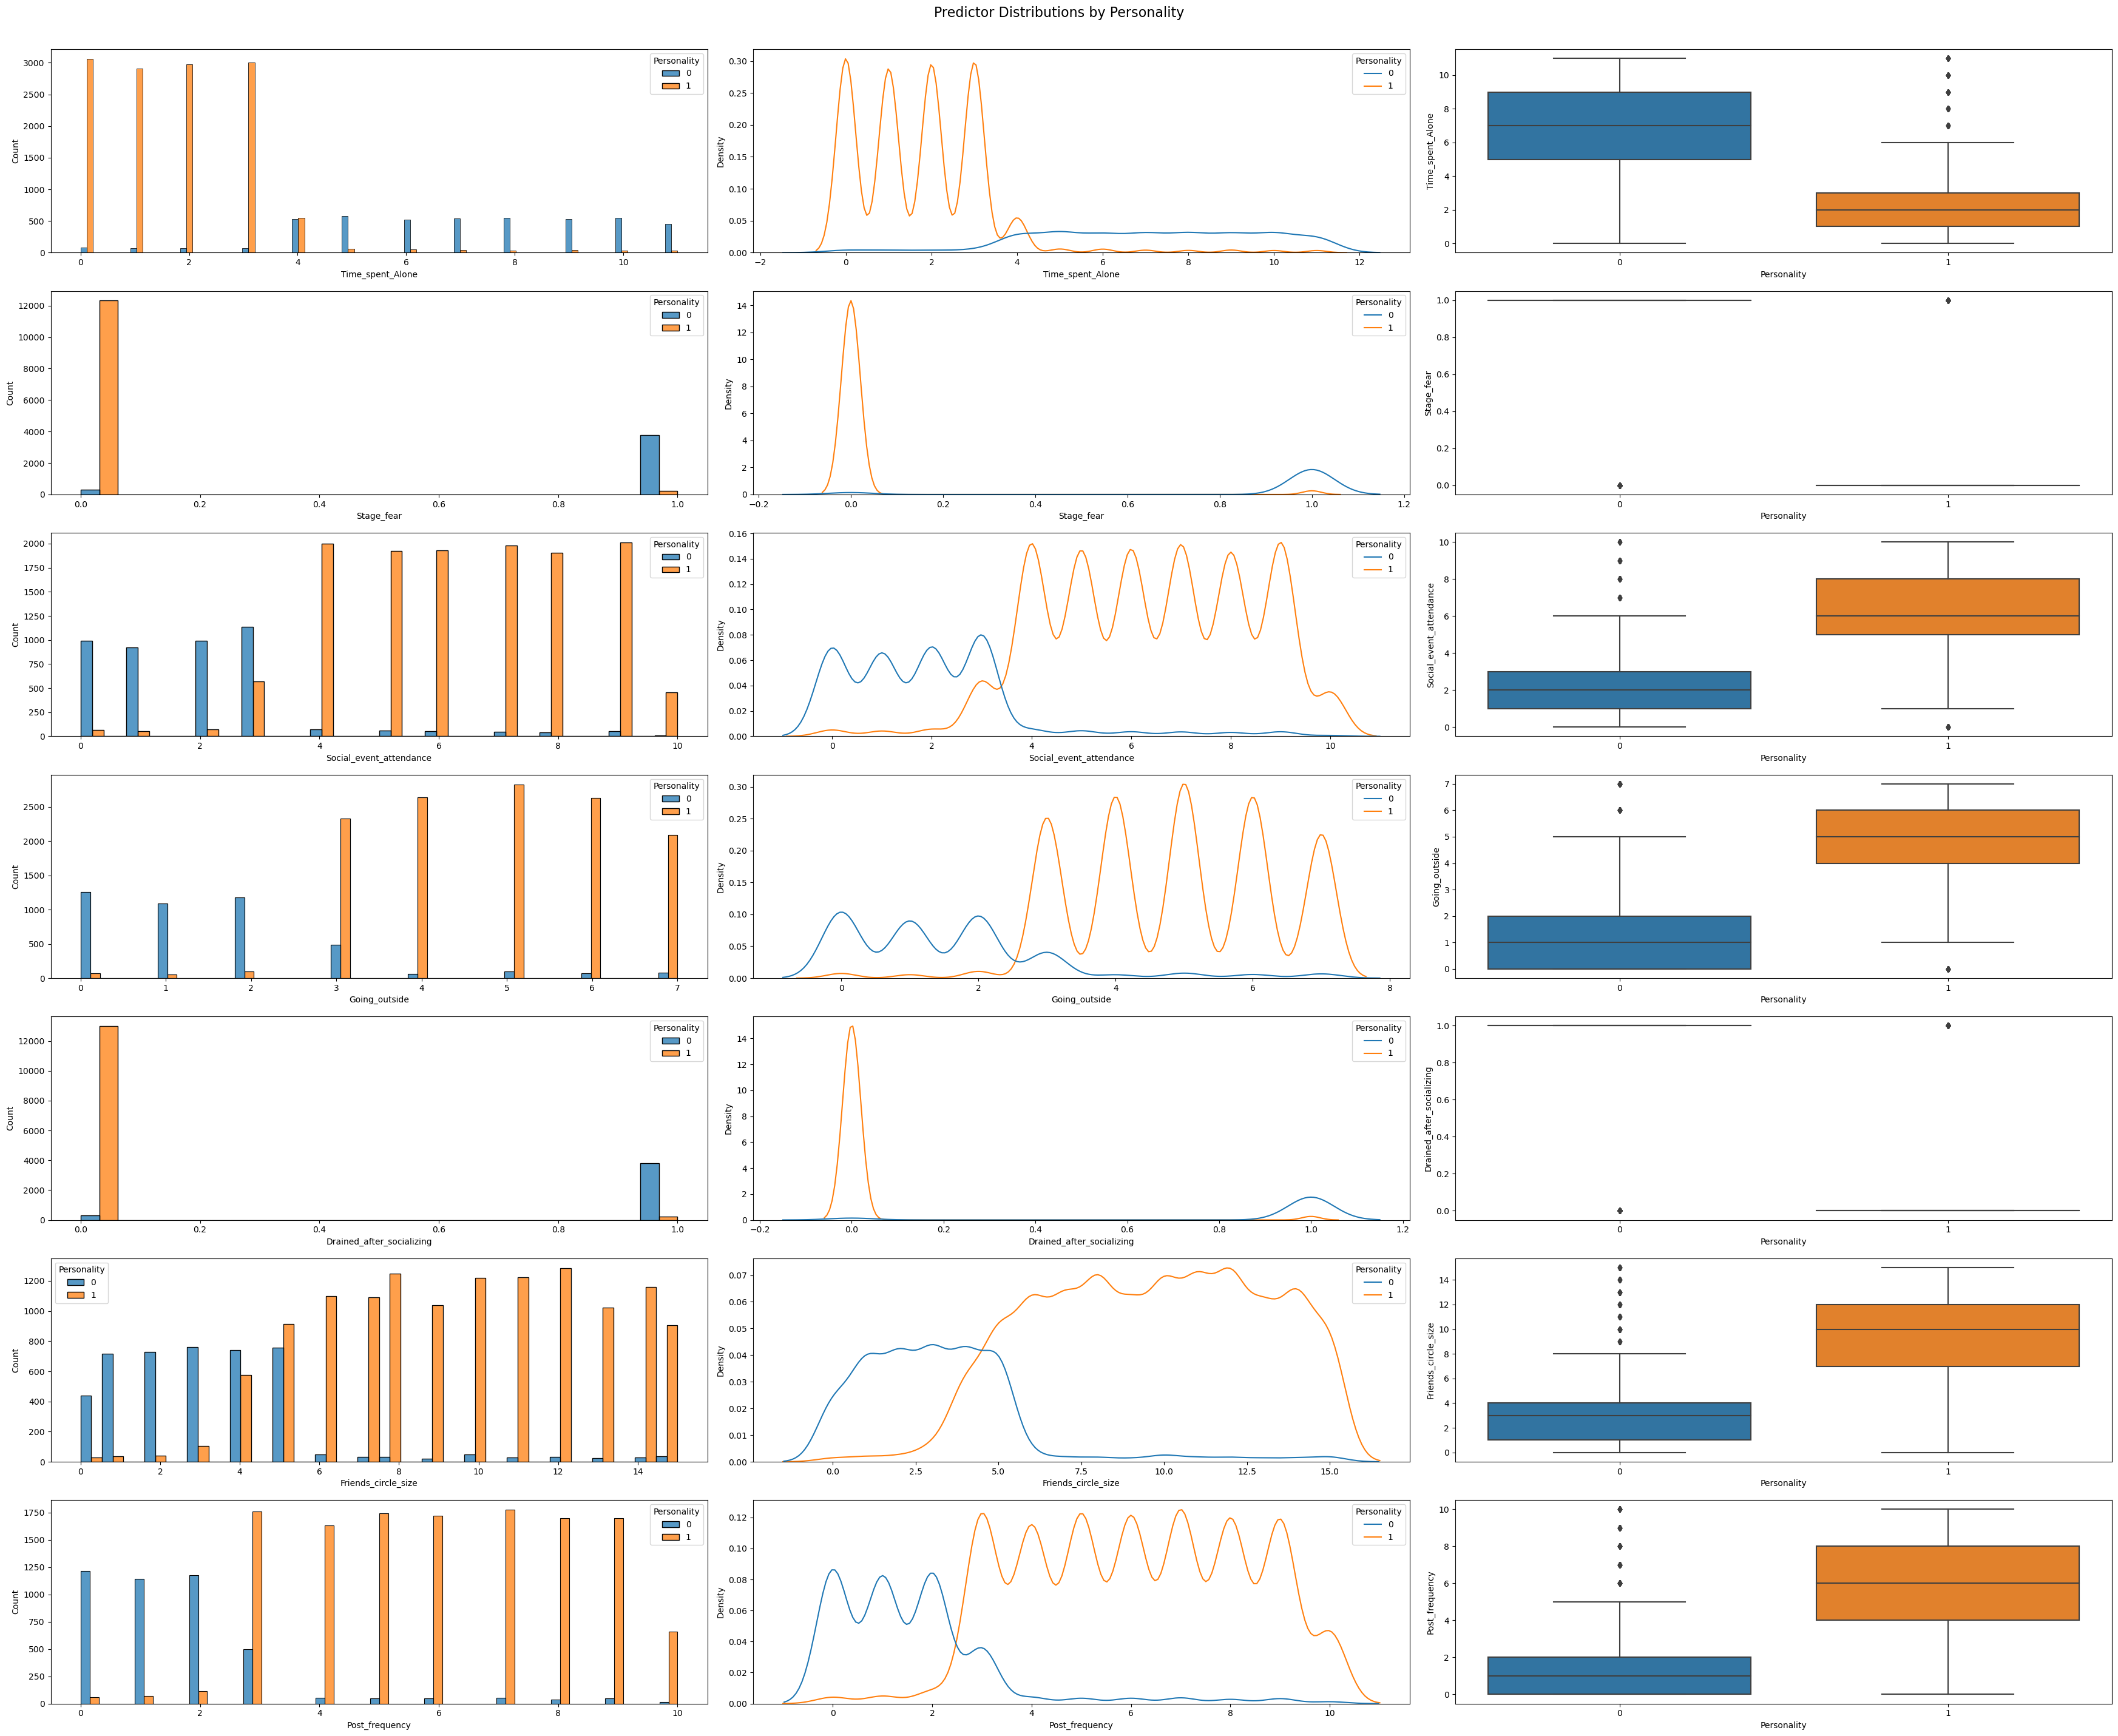

In [55]:
Y = 'Personality'
nrows =  len(X_names)
fig, axes = plt.subplots(nrows,ncols =3, figsize=(35, 4*n_rows))

for i, col in enumerate(X_names):
    sns.histplot(
        data=data, 
        x=col, 
        hue=Y, 
        ax=axes[i,0],
        multiple = 'dodge'
    )
    sns.kdeplot(data = data, x=col, hue = Y, ax = axes[i,1])
    sns.boxplot(data = data, x=Y,y= col, ax = axes[i,2])
plt.tight_layout()
plt.suptitle(f'Predictor Distributions by {Y}', y=1.02, fontsize=16)
plt.show()

Based on the EDA , we find clear patterns behind each feature with target variable. 
it gives me clue to fill up the missing value in each feature.

# Clean the data including filling missing value and detect outliers

Firstly, fill up the objective value with a clear pattern

In [57]:

# Fill NaNs where target == 1 with 1
data.loc[data['Personality'] == 1, 'Stage_fear'] = data.loc[data['Personality'] == 1, 'Stage_fear'].fillna(0.0)

# Fill NaNs where target == 0 with 0
data.loc[data['Personality'] == 0, 'Stage_fear'] = data.loc[data['Personality'] == 0, 'Stage_fear'].fillna(1.0)


data.loc[data['Personality'] == 1, 'Drained_after_socializing'] = data.loc[data['Personality'] == 1, 'Drained_after_socializing'].fillna(0.0)

# Fill NaNs where target == 0 with 0
data.loc[data['Personality'] == 0, 'Drained_after_socializing'] = data.loc[data['Personality'] == 0, 'Drained_after_socializing'].fillna(1.0)



In [63]:
cols_fill = num_cols.columns.tolist()
cols_fill.remove('id')
for col in cols_fill:
    group_median = data.groupby('Personality')[col].transform('median')
    data[col] = data[col].fillna(np.floor(group_median).astype(float)) 

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  float64
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  float64
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


detect outliers

In [68]:
from scipy import stats
z_scores = np.abs(stats.zscore(data[X_names]))
outliers = (z_scores > 3).any(axis=1)
print(outliers)
print(f"Outliers detected: {outliers.sum()}")

0        False
1        False
2        False
3        False
4        False
         ...  
18519    False
18520    False
18521    False
18522    False
18523    False
Length: 18524, dtype: bool
Outliers detected: 0


# Feature engineering 

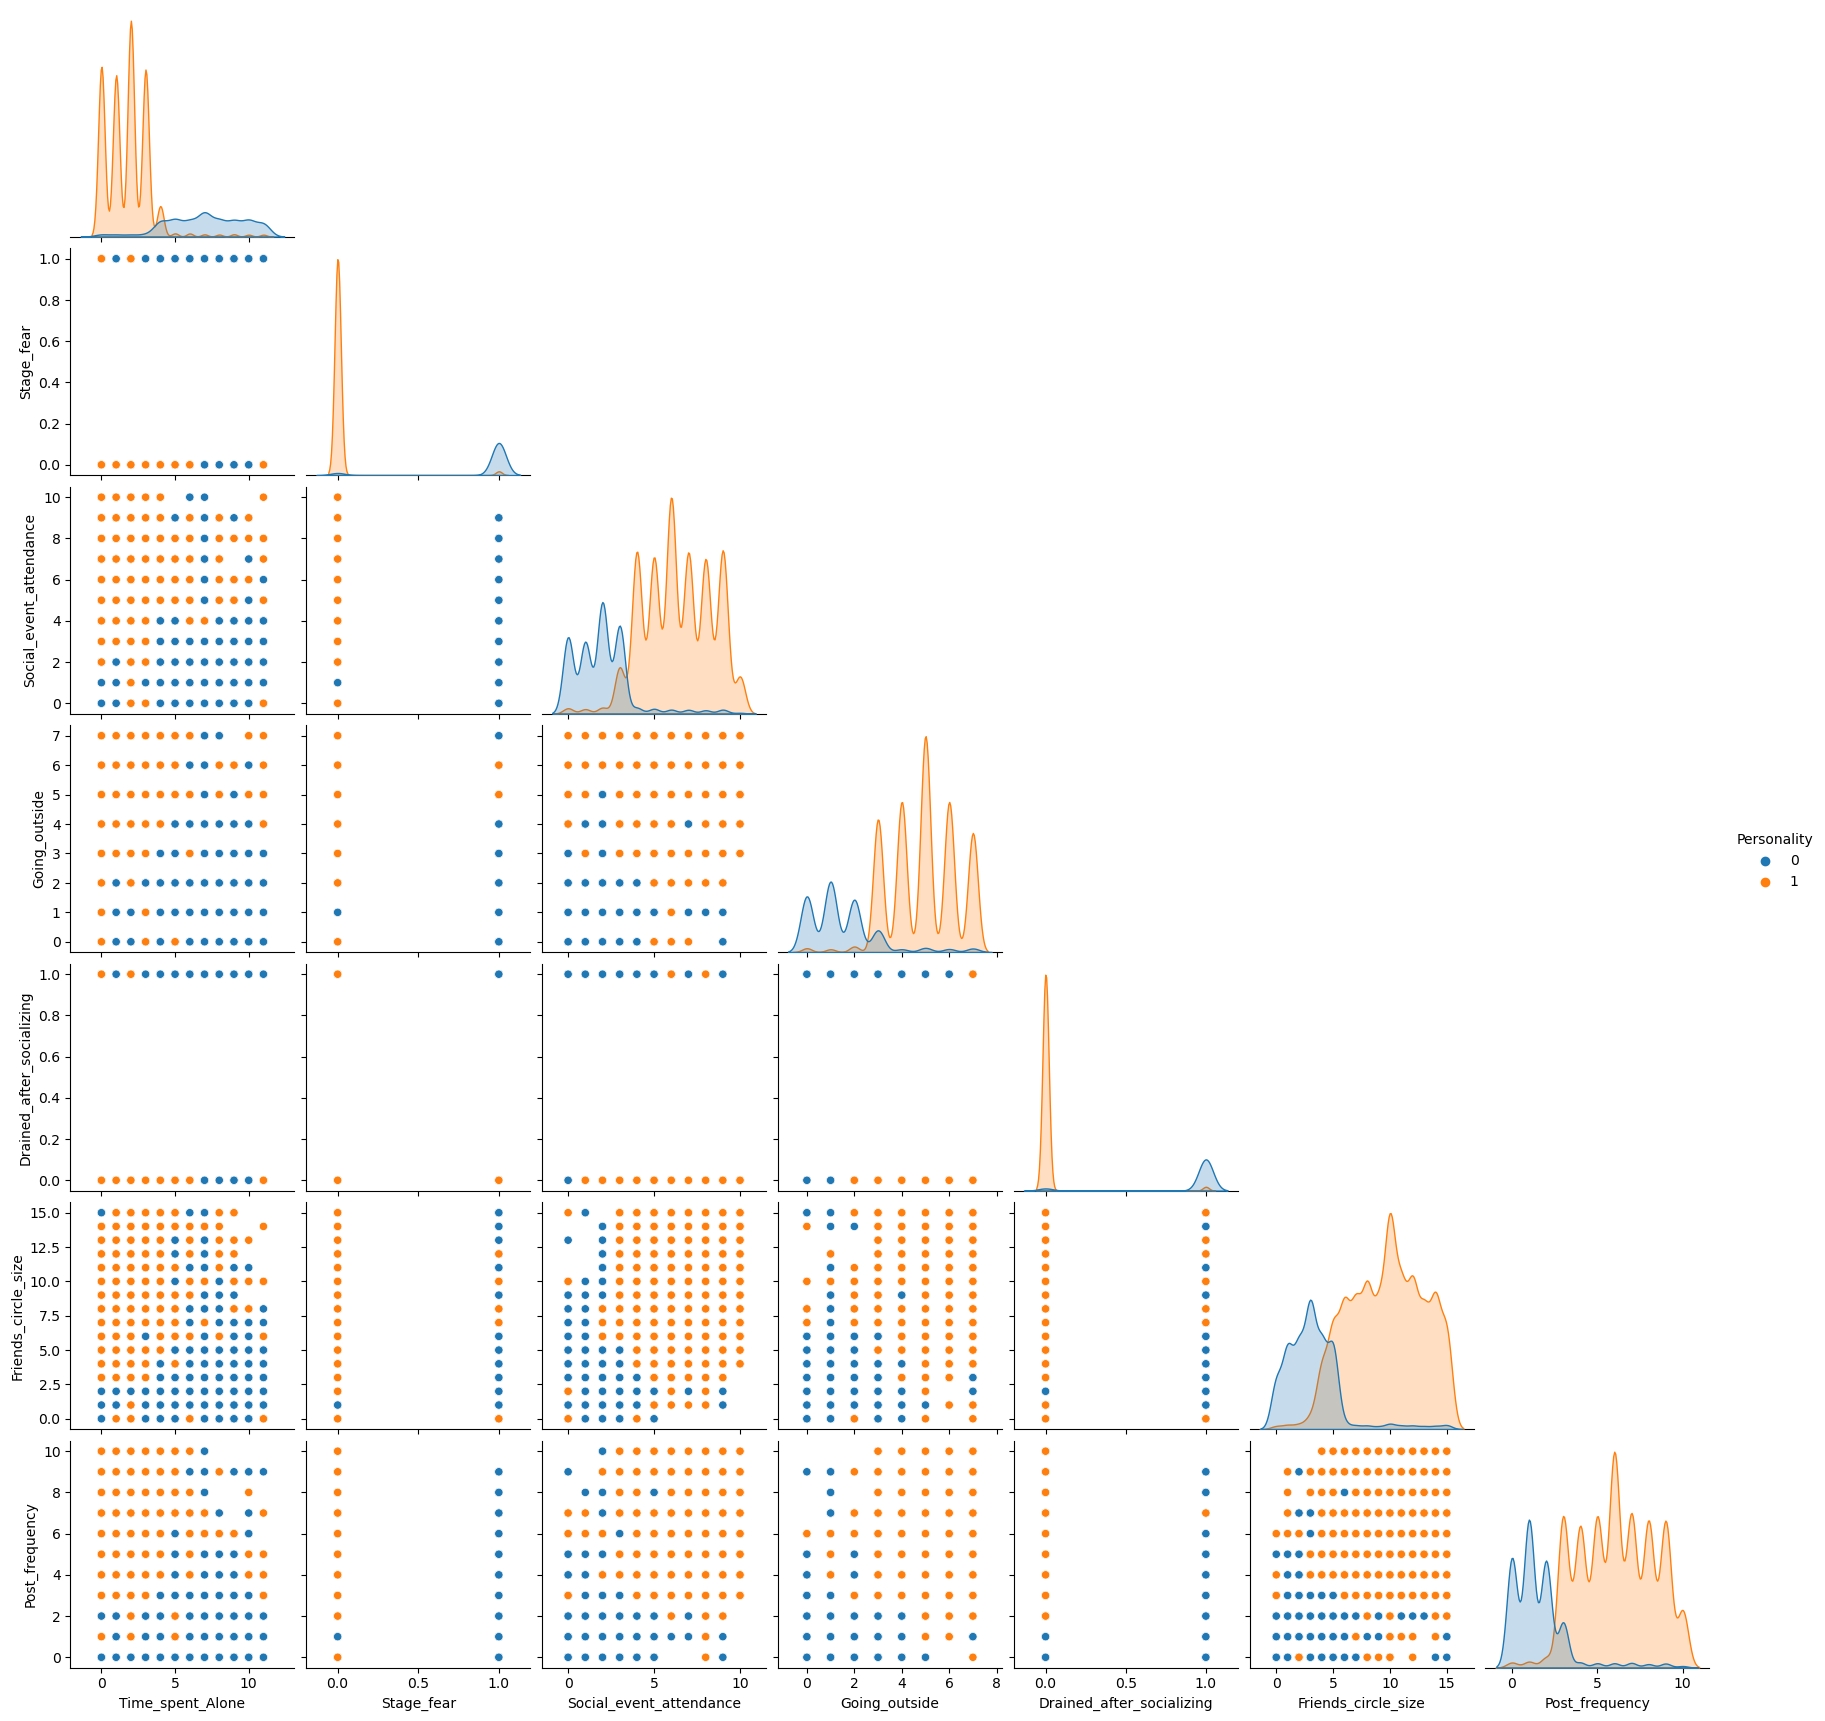

In [70]:
df = data.drop(columns = ['id'])
sns.pairplot(df,hue = 'Personality',corner = True)
plt.title
plt.show()

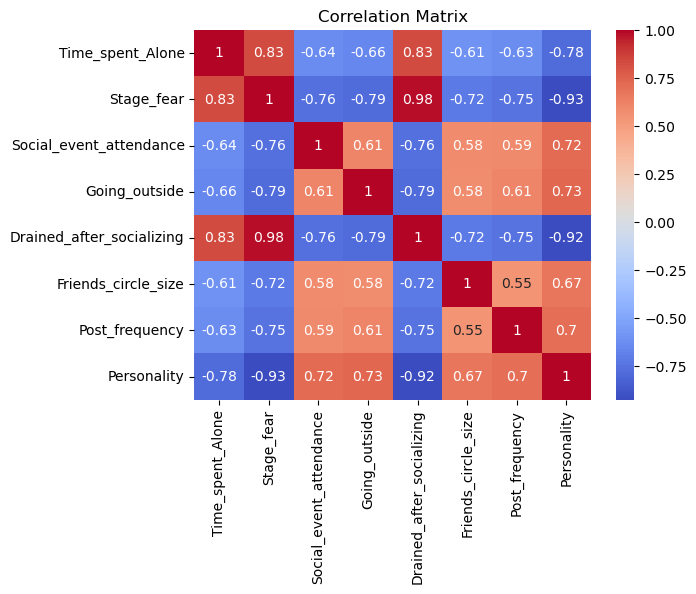

In [71]:
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [72]:
data['Personality'].value_counts()

1    13699
0     4825
Name: Personality, dtype: int64

deal with the imbalanced data and then train the dataset with the rebalanced data

In [74]:
from sklearn.model_selection import train_test_split as tr_te_split
from imblearn.over_sampling import SMOTE
X = data.drop(columns = ['id','Personality'])
Y = data['Personality'].ravel()
X_train, X_test, y_train, y_test = tr_te_split(X, Y, test_size=0.3,random_state=666)

sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 3. Verify new class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_res))

Original class distribution: [3409 9557]
Resampled class distribution: [9557 9557]


Since there is only 7 features, i will use polynomial features to systematically generate polynomial and interaction features, enlarging the space and then use feature selection to select the best suitable features.

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score,confusion_matrix

poly_pipe = make_pipeline(PolynomialFeatures(degree=2,include_bias=False), RidgeClassifier())
poly_pipe.fit(X_train_res, y_train_res)
y_pred = poly_pipe.predict(X_test)

print("F1 Score:", round(f1_score(y_test, y_pred),5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


F1 Score: 0.98144
Confusion Matrix:
 [[1332   84]
 [  70 4072]]


In [82]:
poly = poly_pipe.named_steps['polynomialfeatures']
feature_names = poly.get_feature_names_out(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency'])
print(feature_names.tolist())

['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Time_spent_Alone^2', 'Time_spent_Alone Stage_fear', 'Time_spent_Alone Social_event_attendance', 'Time_spent_Alone Going_outside', 'Time_spent_Alone Drained_after_socializing', 'Time_spent_Alone Friends_circle_size', 'Time_spent_Alone Post_frequency', 'Stage_fear^2', 'Stage_fear Social_event_attendance', 'Stage_fear Going_outside', 'Stage_fear Drained_after_socializing', 'Stage_fear Friends_circle_size', 'Stage_fear Post_frequency', 'Social_event_attendance^2', 'Social_event_attendance Going_outside', 'Social_event_attendance Drained_after_socializing', 'Social_event_attendance Friends_circle_size', 'Social_event_attendance Post_frequency', 'Going_outside^2', 'Going_outside Drained_after_socializing', 'Going_outside Friends_circle_size', 'Going_outside Post_frequency', 'Drained_after_socializing^2', 'Drained_after_socializing Friends_circl

Use RFE method to select the suitable features

In [95]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
scaler.fit(X_train_res)
X_train_scaled = scaler.transform(X_train_res)

rfe = RFECV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), cv=10,scoring = 'f1')

rfe.fit(X_train_scaled, y_train_res)

print("The the support of the selected features are: ",rfe.support_)

print('\n')

print("The selected features are: ",X_train.columns[rfe.support_])

The the support of the selected features are:  [False  True False False False False False]


The selected features are:  Index(['Stage_fear'], dtype='object')


In [96]:
print(f"Optimal number of features: {rfe.n_features_}")
print("The ranking of the features is: ",rfe.ranking_)
print("The the support of the selected features are: ",rfe.support_)
print("The selected features are: ",X_train.columns[rfe.support_])

Optimal number of features: 1
The ranking of the features is:  [3 1 5 4 2 7 6]
The the support of the selected features are:  [False  True False False False False False]
The selected features are:  Index(['Stage_fear'], dtype='object')


In [98]:
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2,include_bias=False),
                                 RFECV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), cv=10,min_features_to_select = 7,
                                       scoring = 'f1'),
                                 RidgeClassifier())


pipe_rfe_ridgecv.fit(X_train_res, y_train_res)
y_pred = pipe_rfe_ridgecv.predict(X_test)

print("F1 Score:", round(f1_score(y_test, y_pred),5)) 

rfecv = pipe_rfe_ridgecv.named_steps['rfecv']
poly = pipe_rfe_ridgecv.named_steps['polynomialfeatures']
expanded_feature_names = poly.get_feature_names_out(X_train.columns)

print(f"Optimal number of features: {rfecv.n_features_}")
print("The the support of the selected features are: ",rfecv.support_)
print("The selected features are: ",expanded_feature_names[rfecv.support_])

F1 Score: 0.98144
Optimal number of features: 24
The the support of the selected features are:  [ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True False  True False
 False False  True False  True  True False  True  True False False]
The selected features are:  ['Time_spent_Alone' 'Stage_fear' 'Social_event_attendance'
 'Drained_after_socializing' 'Friends_circle_size' 'Post_frequency'
 'Time_spent_Alone^2' 'Time_spent_Alone Stage_fear'
 'Time_spent_Alone Social_event_attendance'
 'Time_spent_Alone Going_outside'
 'Time_spent_Alone Drained_after_socializing'
 'Time_spent_Alone Friends_circle_size' 'Time_spent_Alone Post_frequency'
 'Stage_fear^2' 'Stage_fear Social_event_attendance'
 'Stage_fear Drained_after_socializing' 'Stage_fear Post_frequency'
 'Social_event_attendance^2'
 'Social_event_attendance Drained_after_socializing'
 'Going_outside Drained_after_socializing' 'Going_outside Post_frequency'
 'Draine

incporating the polynomial features, the optimal features increase to 24 from 1. Following that, it is time to choose the model and train the data.

# Model Selection and evaluation

three models will be introduced - - Logistics as the benchmark, SVM and random forest.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
# make sure the selected features after polynomial function
X_train_poly = poly.transform(X_train_res)
X_test_poly = poly.transform(X_test)

X_train_selected = X_train_poly[:, rfecv.support_]
X_test_selected = X_test_poly[:, rfecv.support_]

scaler_1 = StandardScaler()
scaler_1.fit(X_train_selected)

X_train_selected_scaled = scaler_1.transform(X_train_selected)
X_test_selected_scaled = scaler_1.transform(X_test_selected)

D:\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [102]:
logistic = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logistic.fit(X_train_selected_scaled,y_train_res)
y_pred1 =logistic.predict(X_test_selected_scaled)
f1_logistic = f1_score(y_test, y_pred1)
print(f"F1 Score: {f1_logistic:.4f}")
print(classification_report(y_test, y_pred1))

F1 Score: 0.9806
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1416
           1       0.98      0.98      0.98      4142

    accuracy                           0.97      5558
   macro avg       0.96      0.96      0.96      5558
weighted avg       0.97      0.97      0.97      5558



In [103]:
svm = SVC(
    kernel='rbf',          # Radial Basis Function kernel
    C=1.0,                 # Regularization parameter
    gamma='scale',         # Kernel coefficient
    probability=True,      # Enable predict_proba
    random_state=666
)
svm.fit(X_train_selected_scaled,y_train_res)
y_pred2 =svm.predict(X_test_selected_scaled)
f1_svm = f1_score(y_test, y_pred2)
print(f"F1 Score: {f1_svm:.4f}")
print(classification_report(y_test, y_pred2))

F1 Score: 0.9827
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1416
           1       0.98      0.98      0.98      4142

    accuracy                           0.97      5558
   macro avg       0.96      0.97      0.97      5558
weighted avg       0.97      0.97      0.97      5558



In [106]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_dist = {
    'n_estimators': np.arange(100, 800, 50),      # Number of trees
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(np.arange(5, 50, 5)),  # Tree depth
    'min_samples_split': np.arange(2, 20),       # Min samples to split
    'min_samples_leaf': np.arange(1, 10),        # Min samples at leaf
    'max_features': ['sqrt', 'log2', None],       # Features per split
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=666, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=100,                 # Number of parameter combinations to try
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=666
)

rf_random.fit(X_train, y_train)

# Best results
print("Random Forest Best Parameters:", rf_random.best_params_)
print("Random Forest Best F1 Score:", rf_random.best_score_)

rf_best = RandomForestClassifier(**rf_random.best_params_)
rf_best.fit(X_train_selected_scaled,y_train_res)

# Predict and evaluate
y_pred3 = rf_best.predict(X_test_selected_scaled)
f1_rf = f1_score(y_test, y_pred3)
print(f"F1 Score: {f1_rf:.4f}")
print(classification_report(y_test, y_pred3))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest Best Parameters: {'n_estimators': 250, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Random Forest Best F1 Score: 0.9822738216716018
F1 Score: 0.9841
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1416
           1       0.98      0.99      0.98      4142

    accuracy                           0.98      5558
   macro avg       0.97      0.97      0.97      5558
weighted avg       0.98      0.98      0.98      5558



In [110]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)

# Define hyperparameter distributions
param_dist = {
    'learning_rate': np.logspace(-3, 0, 20),  # 0.001 to 1.0 (log scale)
    'n_estimators': np.arange(50, 500, 50),     # 50 to 450
    'max_depth': np.arange(3, 21),              # 3 to 11
    'min_child_weight': np.arange(1, 7),        # 1 to 6
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],          # Regularization
    'subsample': np.linspace(0.6, 1.0, 5),      # 0.6, 0.7, ..., 1.0
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,                   # Number of parameter combinations to try
    scoring='f1',            # Metric to evaluate (use 'roc_auc', 'f1', etc. as needed)
    cv=5,                         # 5-fold cross-validation
    verbose=2,                    # Print progress
    random_state=42,
    n_jobs=-1                     # Use all CPU cores
)

random_search.fit(X_train_selected_scaled,y_train_res)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score: {:.4f}".format(random_search.best_score_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.4832930238571752, 'gamma': 0.4, 'colsample_bytree': 1.0}
Best CV Score: 0.9787


In [111]:
model_best = XGBClassifier(**random_search.best_params_)
model_best.fit(X_train_selected_scaled,y_train_res)
y_pred4 = rf_best.predict(X_test_selected_scaled)
f1_xgb = f1_score(y_test, y_pred4)
print(f"F1 Score: {f1_xgb:.4f}")
print(classification_report(y_test, y_pred4))

F1 Score: 0.9841
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1416
           1       0.98      0.99      0.98      4142

    accuracy                           0.98      5558
   macro avg       0.97      0.97      0.97      5558
weighted avg       0.98      0.98      0.98      5558



based on the above model selection and evaluation, the final determination is random forest. Then I will use this model to predict the real test data

In [144]:
df_test = pd.read_csv("test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [145]:
id = df_test['id']
id

0       18524
1       18525
2       18526
3       18527
4       18528
        ...  
6170    24694
6171    24695
6172    24696
6173    24697
6174    24698
Name: id, Length: 6175, dtype: int64

In [146]:
null_ratio = df_test.isnull().sum()/len(data)*100
null_ratio = null_ratio.round(2).astype(str) + '%'
print(null_ratio)

id                            0.0%
Time_spent_Alone             2.29%
Stage_fear                   3.23%
Social_event_attendance      2.14%
Going_outside                2.52%
Drained_after_socializing    2.33%
Friends_circle_size          1.89%
Post_frequency                2.2%
dtype: object


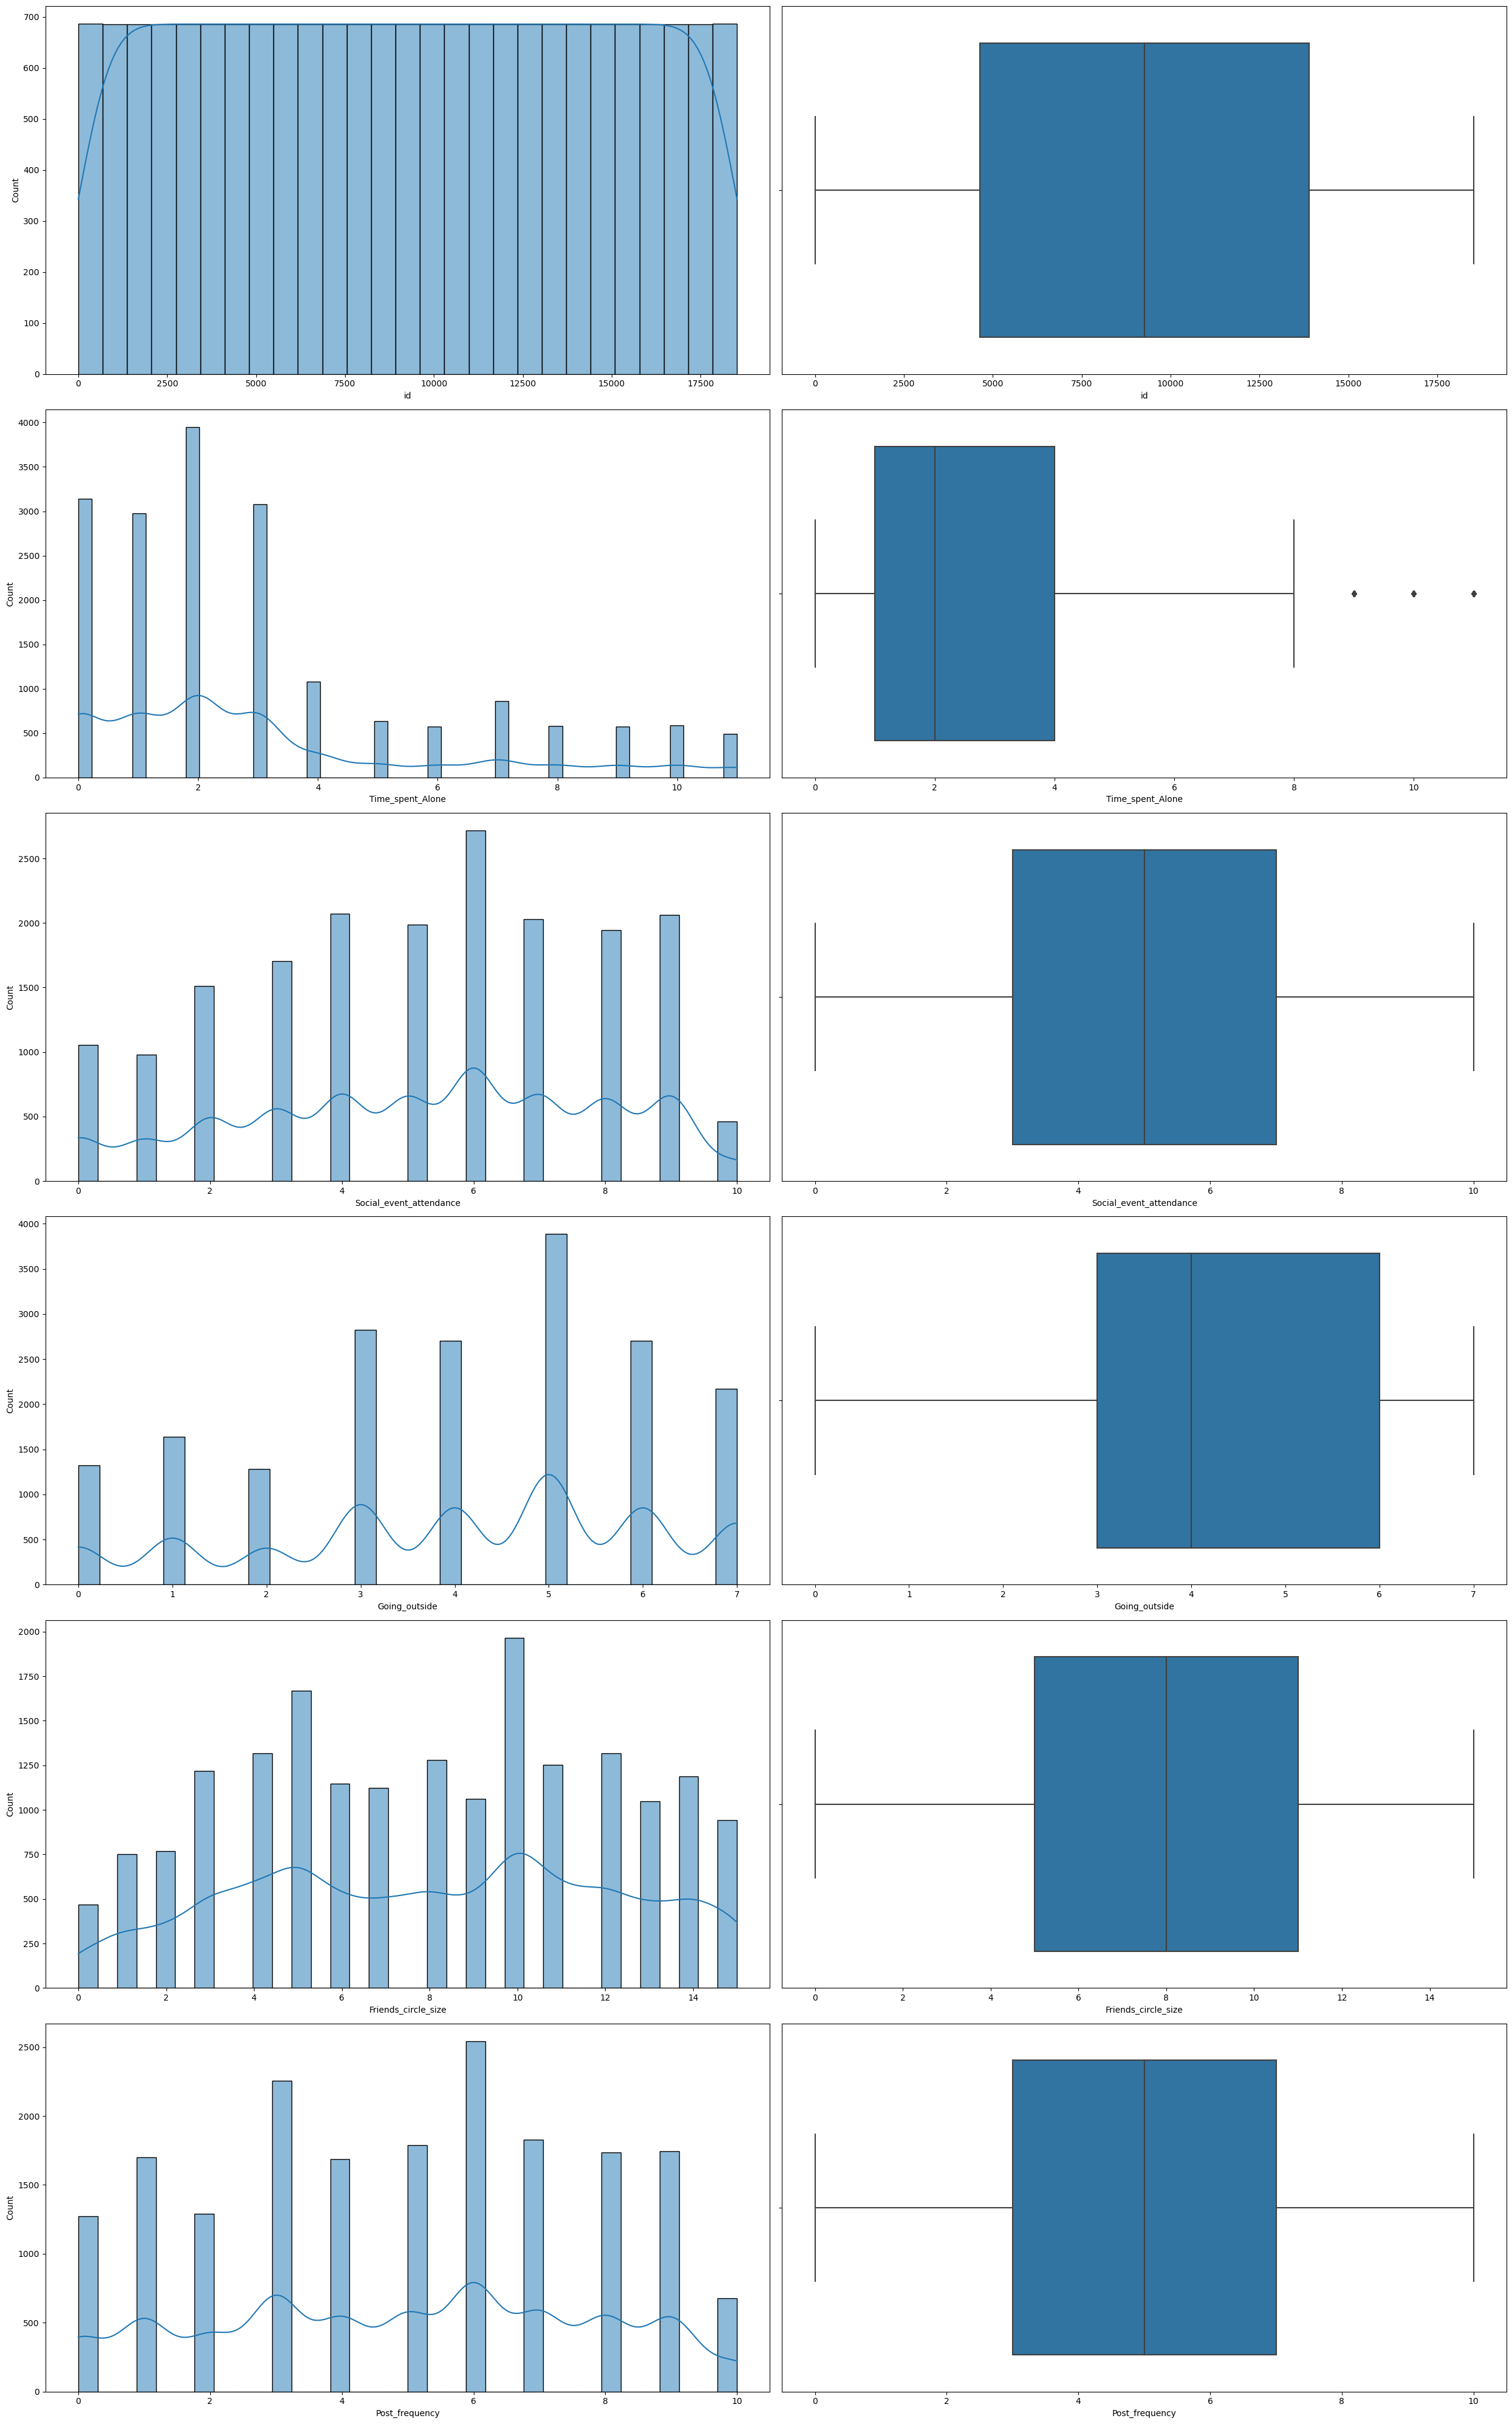

In [116]:
nums =df_test.select_dtypes(include='number')
objs = df_test.select_dtypes(include='object')

fig, axes = plt.subplots(nrows=6,ncols =2, figsize=(25, 40))
for i, col in enumerate(nums):
    sns.histplot(data[col], kde=True, ax=axes[i,0])
    sns.boxplot(x=data[col], ax=axes[i,1])
plt.tight_layout()
plt.show()

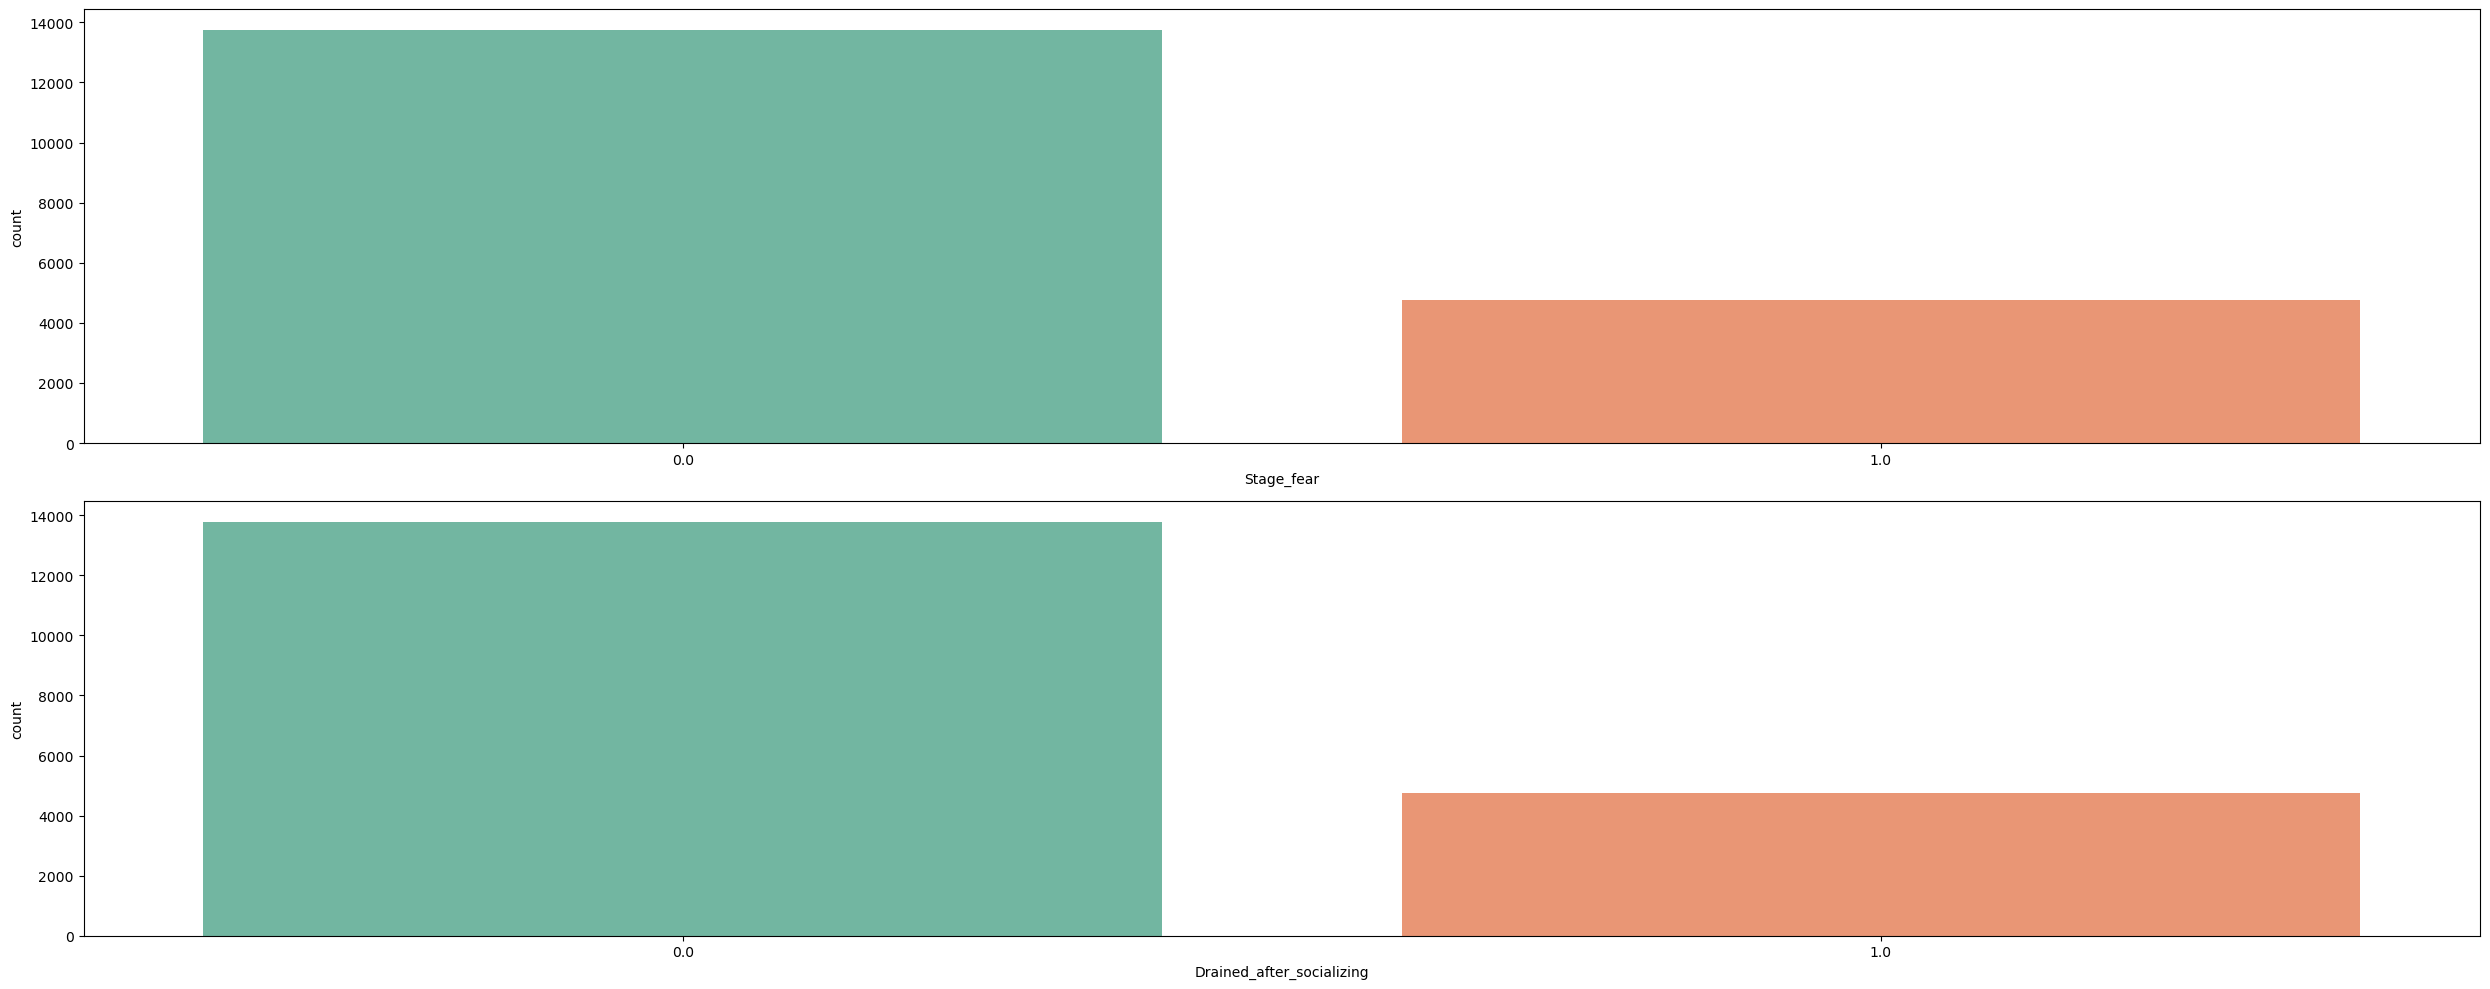

In [117]:
fig, axes = plt.subplots(nrows=2,ncols =1, figsize=(25, 10))
for i, col in enumerate(objs):
    sns.countplot(x=data[col], ax=axes[i], palette='Set2')
plt.tight_layout()
plt.show()

In [147]:
df_test['Stage_fear'] = df_test['Stage_fear'].map(conversion_1)
df_test['Drained_after_socializing'] = df_test['Drained_after_socializing'].map(conversion_1)
df_test[['Stage_fear','Drained_after_socializing']]

,Stage_fear,Drained_after_socializing
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
6170,0.0,0.0
6171,1.0,1.0
6172,0.0,0.0
6173,0.0,0.0


since the test data has missing value, utilize the KNN imputer to fill up with the most probable value. Before that, since stage_fear and Drained_after_socializing has high correlation, refer to each other to fill up the nan

In [148]:
df_test['Stage_fear'] = df_test['Stage_fear'].fillna(df_test['Drained_after_socializing'])
df_test['Drained_after_socializing']  = df_test['Drained_after_socializing'].fillna(df_test['Stage_fear'])
df_test[['Stage_fear','Drained_after_socializing']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stage_fear                 6158 non-null   float64
 1   Drained_after_socializing  6158 non-null   float64
dtypes: float64(2)
memory usage: 96.6 KB


In [149]:
from sklearn.impute import KNNImputer
imputer =  KNNImputer(n_neighbors=5,weights = 'distance', metric='nan_euclidean')
df_test = df_test.drop(columns = 'id')
imputed_data = imputer.fit_transform(df_test)
imputed_df = pd.DataFrame(imputed_data, columns=df_test.columns)
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           6175 non-null   float64
 1   Stage_fear                 6175 non-null   float64
 2   Social_event_attendance    6175 non-null   float64
 3   Going_outside              6175 non-null   float64
 4   Drained_after_socializing  6175 non-null   float64
 5   Friends_circle_size        6175 non-null   float64
 6   Post_frequency             6175 non-null   float64
dtypes: float64(7)
memory usage: 337.8 KB


In [150]:
imputed_df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
count,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000
mean,3.096967,0.251822,5.231511,4.005439,0.251336,7.970081,4.982173
std,2.959027,0.434095,2.752097,2.033549,0.433816,4.163966,2.850964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000
50%,2.000000,0.000000,5.000000,4.000000,0.000000,8.000000,5.000000
75%,4.000000,1.000000,7.400000,6.000000,1.000000,11.000000,7.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000


In [161]:
imputed_df_poly = poly.transform(imputed_df)
imputed_df_selected = imputed_df_poly[:, rfecv.support_]


scaler_2 = StandardScaler()
scaler_2.fit(imputed_df_selected )

imputed_df_selected_scaled = scaler_2.transform(imputed_df_selected)

test_label = rf_best.predict(imputed_df_selected_scaled)
test_label = pd.DataFrame(test_label,columns = ['Personality'])
test_label

D:\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


,Personality
0,0
1,0
2,0
3,0
4,0
...,...
6170,0
6171,0
6172,0
6173,0


In [162]:
test_label.value_counts()

Personality
0              6155
1                20
dtype: int64

In [163]:
conversion_peronality = {1:'Introvert',0:'Extrovert'}
test_label['Personality'] = test_label['Personality'].map(conversion_peronality)
test_label

,Personality
0,Extrovert
1,Extrovert
2,Extrovert
3,Extrovert
4,Extrovert
...,...
6170,Extrovert
6171,Extrovert
6172,Extrovert
6173,Extrovert


In [164]:
final = pd.concat([id,test_label],axis = 1)
final

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert
...,...,...
6170,24694,Extrovert
6171,24695,Extrovert
6172,24696,Extrovert
6173,24697,Extrovert


In [165]:
final.to_csv('submission.csv', index=False)